# SVM IMAGE CLASSIFICATION

https://deepsense.ai/deep-learning-for-satellite-imagery-via-image-segmentation/
    
https://stackoverflow.com/questions/43331510/how-to-train-an-svm-classifier-on-a-satellite-image-using-python

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [1]:
import pandas as pd
import numpy as np
import functools
import matplotlib.pyplot as plt
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from PIL import Image
from skimage.transform import resize


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(200, 200, 3)
(200, 200, 3)


(40000, 3)

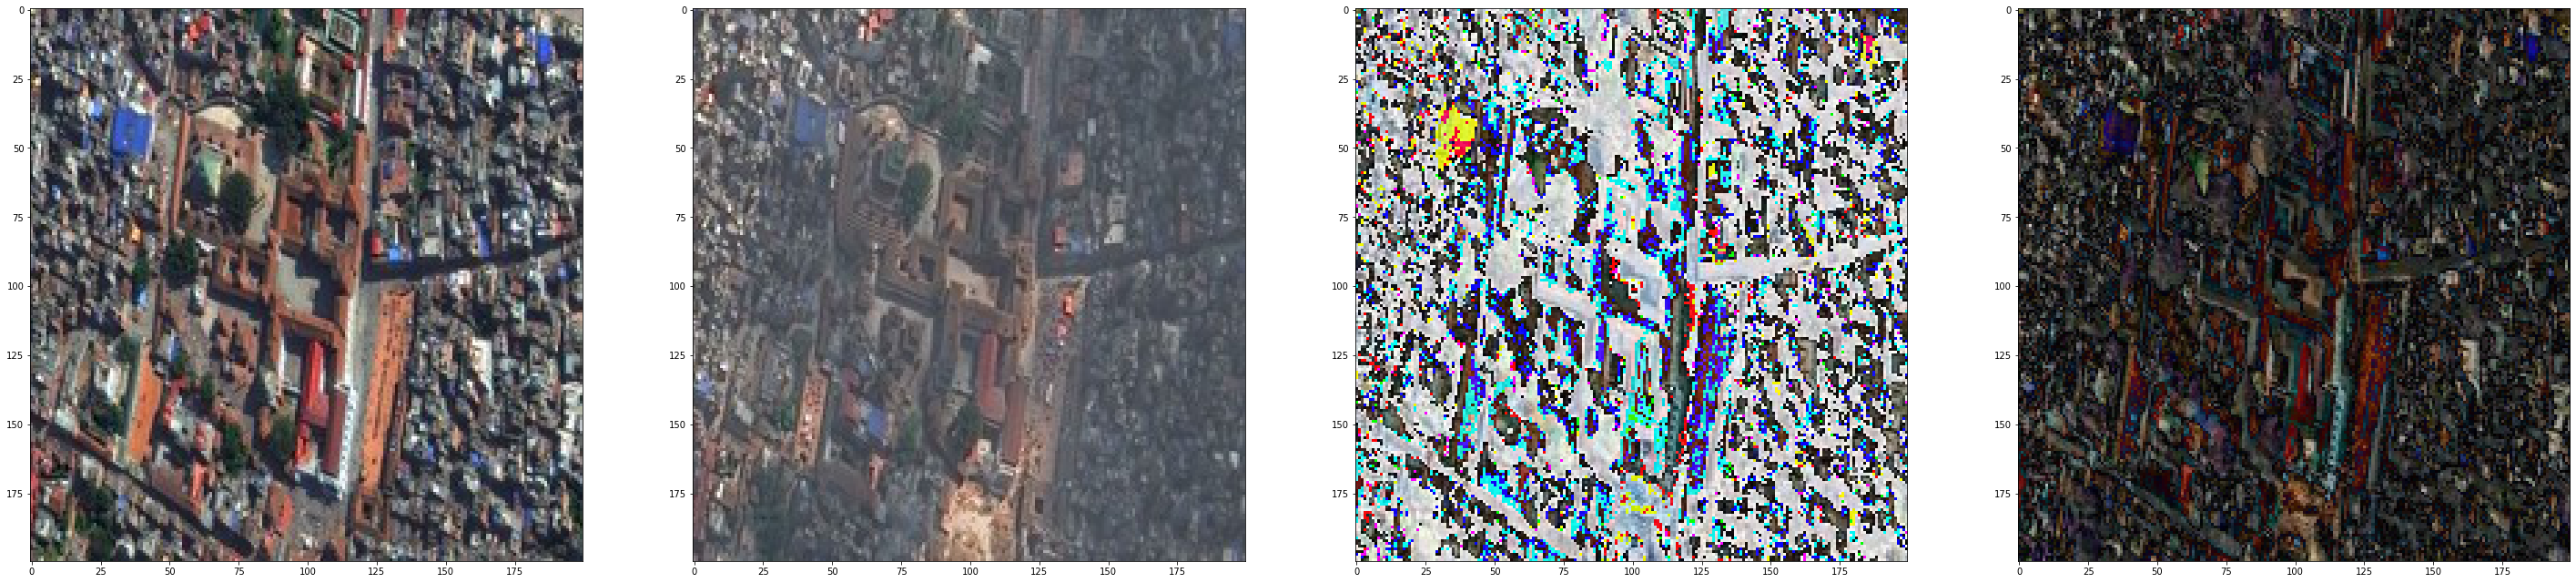

In [2]:

# Data Acquasition and Data Processing.


image1 = io.imread('a1.jpg')
image2 = io.imread('a2.jpg')

#rresizing the above images.
#image1=np.resize(image1,(1200,1029))
#image2=np.resize(image2,(1200,1029))

#image22= resize(image2,(45,45), mode='reflect') # img_resized2
#image22=image22.flatten('c')



image3 = io.imread('a1.jpg')/255     # dividing by 255 to bring the pixel values between 0  
image4 = io.imread('a2.jpg')/255    # dividing by 255 to bring the pixel values between 0 

#rresizing the above images.
#image3=np.resize(image3,(1200,1029))
#image4=np.resize(image4,(1200,1029))


#image22=np.resize(image1,(1200,1029))
#image1=image1.resize(421,748)
#image2=image2.resize(741,988,3)

diff_image =abs((image1) - (image2))
diff_image1=abs(image3-image4)

#ploting images
f, (ax1,ax2, ax3,ax4) = plt.subplots(1, 4 ,figsize=(50,50))
ax1.imshow(image1) 
ax2.imshow(image2) 
ax3.imshow(diff_image) 
ax4.imshow(diff_image1) 

#ploting the shapes of images.
print(diff_image.shape)
print(diff_image1.shape)

io.imsave('aresult_1.png',diff_image)
io.imsave('aresult_2.png',diff_image1)

# Total image size.
pic_n = diff_image1.reshape(diff_image1.shape[0]*diff_image1.shape[1], diff_image1.shape[2])
pic_n.shape

In [3]:
#Step-1

img=io.imread("aresult_1.png")

img1=io.imread("aresult_2.png")



rows, cols, bands = img1.shape
classes = {'Damaged': 1, 'Undamaged': 0}
n_classes = len(classes)
palette = np.uint8([[255, 0, 0], [0, 255, 0]])

In [4]:
#Step-2

from sklearn.cluster import KMeans
from sklearn.svm import SVC
X = img.reshape(rows*cols, bands)
kmeans = KMeans(n_clusters=n_classes, random_state=2).fit(X)
supervised = kmeans.labels_.reshape(rows, cols)  


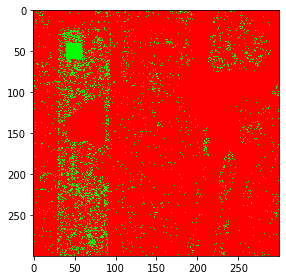

In [8]:
#Step-3 Training model with images.

import numpy as np
from skimage import io
from sklearn.svm import SVC

img = io.imread('https://i.stack.imgur.com/TFOv7.png')

rows, cols, bands = img.shape
classes = {'damaged': 0, 'undamaged': 1}
n_classes1 = len(classes)
palette = np.uint8([[255, 0, 0], [0, 255, 0]])


from sklearn.cluster import KMeans

X = img.reshape(rows*cols, bands)
kmeans = KMeans(n_clusters=n_classes, random_state=3).fit(X)
#unsupervised = kmeans.labels_.reshape(rows, cols)

supervised1 = n_classes*np.ones(shape=(rows, cols), dtype=np.int)

supervised1[200:220, 150:170] = classes['damaged']
supervised1[40:60, 40:60] = classes['undamaged']
#The pixels of the ground truth (training set) are used to fit a support vector machine.

y = supervised1.ravel()
train = np.flatnonzero(supervised1 < n_classes1)
test = np.flatnonzero(supervised1 == n_classes1)
clf = SVC(gamma='auto')
clf.fit(X[train], y[train])
y[test] = clf.predict(X[test])

# This is the Trained images.
io.imshow(palette[supervised1])





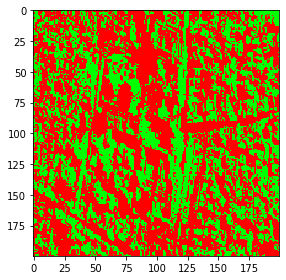

In [9]:
# Resultant Image from svm the 

io.imshow(palette[supervised])
imgg=(palette[supervised])
io.imsave('aresult_3.png',imgg)    

Pixels matched: 16111


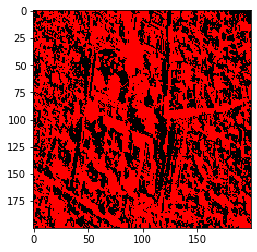

In [46]:
#Converting to rgb 
import numpy as np
from PIL import Image

# Open image and make RGB and HSV versions
RGBim = Image.open("aresult_3.png").convert('RGB')
HSVim = RGBim.convert('HSV')

# Make numpy versions
RGBna = np.array(RGBim)
HSVna = np.array(HSVim)

# Extract Hue
H = HSVna[:,:,0]

# Find all green pixels, i.e. where 100 < Hue < 140
lo,hi = 100,140
# Rescale to 0-255, rather than 0-360 because we are using uint8
lo = int((lo * 255) / 360)
hi = int((hi * 255) / 360)
green = np.where((H>lo) & (H<hi))

# Make all green pixels black in original image
RGBna[green] = [0,0,0]

count = green[0].size
print("Pixels matched: {}".format(count))
Image.fromarray(RGBna).save('aresult_4.png')
im2=io.imread('aresult_4.png')
plt.imshow(im2,cmap='hot')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


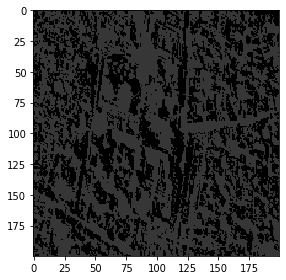

In [47]:
#Converting to gray.


from skimage import color
from skimage import io

img3 = color.rgb2gray(io.imread('aresult_4.png'))

io.imshow(img3)
io.imsave('aresult_5.png',img3)  
    


E:\datasciencepandasudemy\anaconda\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


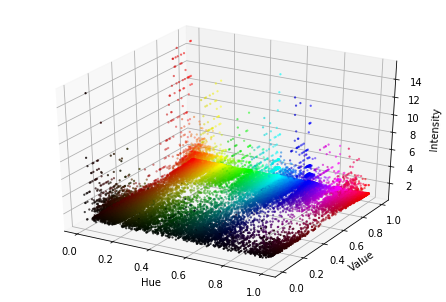

In [53]:
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image

# (1) Import the file to be analyzed!

img_file = Image.open("aresult_1.png")
img = img_file.load()
# (2) Get image width & height in pixels
[xs, ys] = img_file.size
max_intensity = 100
hues = {}

# (3) Examine each pixel in the image file
for x in range(0, xs):
  for y in range(0, ys):
    # (4)  Get the RGB color of the pixel
    [r, g, b] = list(img[x, y])

    # (5)  Normalize pixel color values
    r /= 255.0
    g /= 255.0
    b /= 255.0

    # (6)  Convert RGB color to HSV
    [h, s, v] = colorsys.rgb_to_hsv(r, g, b)

    # (7)  Marginalize s; count how many pixels have matching (h, v)
    if h not in hues:
      hues[h] = {}
    if v not in hues[h]:
      hues[h][v] = 1
    else:
      if hues[h][v] < max_intensity:
        hues[h][v] += 1

# (8)   Decompose the hues object into a set of one dimensional arrays we can use with matplotlib
h_ = []
v_ = []
i = []
colours = []

for h in hues:
  for v in hues[h]:
    h_.append(h)
    v_.append(v)
    i.append(hues[h][v])
    [r, g, b] = colorsys.hsv_to_rgb(h, 1, v)
    colours.append([r, g, b])

# (9)   Plot the graph!
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(h_, v_, i, s=5, c=colours, lw=0)

ax.set_xlabel('Hue')
ax.set_ylabel('Value')
ax.set_zlabel('Intensity')
fig.add_axes(ax)
img1=plt.show()

#io.imsave('result1.png',img1)  # saving the result.
#plt.imshow(diff_image)

In [64]:
import os, sys
import operator
x=[]
y=[]
z=[]

img=io.imread("aresult_1.png")


#img = diff_image11.astype('float')
img = img[:,:,] # convert to 2D array
print("The shape of the resuted image is",img.shape)
row, col, ban =img.shape
for i in range(row):
    for j in range(col):
         for k in range(ban):
            if (img[i,j,k] == 255):
                x.append(i) # get x indices
                y.append(j) # get y indices
                z.append(0) # get z indices     


The shape of the resuted image is (200, 200, 3)


In [65]:
img.shape
white_pix_ind = []
black_pix_ind = []
c=0
c1=0
row,col,ban = img.shape
for i in range(row):
    for j in range(col):
        for k in range(ban):
            if( (img[(i,j,k)]==1).all() ):
                    white_pix_ind.append((i,j))
                    print("the value of damaged index row_index=",i,"column_index=",j)
                     # print([i,j])
            #print("the value of damaged index row_index=",white_pix_ind[i],"column_index=",white_pix_ind[j])
            c=c+1
            if( (img[(i,j,k)]==0).all() ):
                    black_pix_ind.append((i,j))
                    print("the value of undamaged index row_index=",i,"column_index=",j)
           #print("the value of undamaged index row_index=",black_pix_ind[i],"column_index=",black_pix_ind[j])
            
            c1=c1+1
            break;
print()           
print("The conclusion of image:")
print("     The index size  of the resuted image is",img.shape)
print('     The total index values damaged(White) are ',c)
print('     The total index values undamaged(black) are ',c1)    

the value of undamaged index row_index= 0 column_index= 3
the value of damaged index row_index= 0 column_index= 16
the value of undamaged index row_index= 0 column_index= 37
the value of undamaged index row_index= 0 column_index= 108
the value of damaged index row_index= 0 column_index= 148
the value of undamaged index row_index= 1 column_index= 58
the value of damaged index row_index= 2 column_index= 1
the value of undamaged index row_index= 2 column_index= 165
the value of damaged index row_index= 3 column_index= 40
the value of undamaged index row_index= 3 column_index= 127
the value of damaged index row_index= 4 column_index= 142
the value of damaged index row_index= 4 column_index= 145
the value of damaged index row_index= 4 column_index= 154
the value of undamaged index row_index= 5 column_index= 168
the value of damaged index row_index= 6 column_index= 53
the value of damaged index row_index= 6 column_index= 57
the value of undamaged index row_index= 6 column_index= 79
the value

the value of damaged index row_index= 75 column_index= 131
the value of undamaged index row_index= 75 column_index= 177
the value of undamaged index row_index= 76 column_index= 25
the value of undamaged index row_index= 76 column_index= 56
the value of damaged index row_index= 76 column_index= 62
the value of undamaged index row_index= 76 column_index= 65
the value of undamaged index row_index= 76 column_index= 169
the value of damaged index row_index= 77 column_index= 30
the value of damaged index row_index= 77 column_index= 130
the value of undamaged index row_index= 77 column_index= 177
the value of undamaged index row_index= 77 column_index= 179
the value of undamaged index row_index= 77 column_index= 186
the value of undamaged index row_index= 78 column_index= 7
the value of undamaged index row_index= 78 column_index= 153
the value of damaged index row_index= 78 column_index= 167
the value of damaged index row_index= 79 column_index= 103
the value of undamaged index row_index= 79 

the value of damaged index row_index= 142 column_index= 121
the value of damaged index row_index= 142 column_index= 163
the value of undamaged index row_index= 143 column_index= 48
the value of undamaged index row_index= 143 column_index= 73
the value of damaged index row_index= 143 column_index= 74
the value of undamaged index row_index= 145 column_index= 43
the value of undamaged index row_index= 145 column_index= 113
the value of damaged index row_index= 146 column_index= 83
the value of undamaged index row_index= 147 column_index= 95
the value of damaged index row_index= 147 column_index= 119
the value of undamaged index row_index= 148 column_index= 32
the value of undamaged index row_index= 148 column_index= 107
the value of undamaged index row_index= 148 column_index= 138
the value of undamaged index row_index= 148 column_index= 162
the value of damaged index row_index= 149 column_index= 108
the value of undamaged index row_index= 150 column_index= 0
the value of undamaged index 